# Pymaceuticals Inc.
---

### Analysis

- Bar Charts: Number of observed timepoints is approx. 150+ for all drug regimens, 175+ for 9 of the 10 regimens, so meaningfully large for analysis. The drugs with the greatest number of timepoint observations are Capomulin and Ramicane.
- Pie Charts: Number of observations is very closely split by gender, suggesting no gender bias.
- Quartiles, Outliers, Boxplots: Among four promising drugs, Capomulin and Ramicane are associated with smaller tumor volumes at final measured timepoints than Infubinol and Ceftamin, suggesting the former two drugs have greater success in treating the targeted tumors. Across the four drugs summarized, only Infubinal has an outlier observation (one only), suggesting the results are not influenced by outliers.  
- Line Plots: Focusing on individual mice receiving the Capomulin regimen, tumor size tends to decrease steadily until approximately timepoint 25-30, after which tumor size begins to grow; this pattern suggests that over the course of treatment, the targeted tumors develop resistence to or overcome the treatment, reversing its initial beneficial effects. In a small fraction of cases, tumor size accelerates quickly over the treatment period, suggesting no or adverse treatment effect in these instances. Thus, while Capomulin is among the firm's most promising cancer treatments in development, further work is needed to improve performance. Pymaceuticals could scale back R&D for the two lowest-performing drugs to allocate more resources to improving performance of the more promising treatments. 
- Scatter Plots: Again focusing on mice in the Capomulin treatment, tumor volume (size) is strongly positively correlated with mouse weight (size). This result is consistent with other research findings suggesting that excess body fat can create a hormonal and inflammatory environment that promotes tumor growth.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame (DF)
combinedDF = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combinedDF.head()

# NOTE: ORDERING OF ROWS, COLUMNS, AND INDEXES DIFFERS FROM EXAMPLE PROVIDED, 
# AS APPARENTLY THE DATA FILE ABOVE HAS ALREADY BEEN SORTED BY MOUSE ID AND TIMEPOINT; 
# THIS DOES NOT AFFECT CALCULATIONS AND CHART OUTPUTS BELOW, SO I MOVE FORWARD AS-IS.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.

numUniqueMice = combinedDF["Mouse ID"].nunique()
print(f"\nNumber of unique mice: {numUniqueMice}")
print(f"Number of observations: {len(combinedDF)}\n")


Number of unique mice: 249
Number of observations: 1893



In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint.
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Display the number of duplicates.

# NOTE: I GO ABOVE AND BEYOND HERE, TO EXPLORE DIFFERENT WAYS TO LOOK AT DATA AND VERIFY SLICES THAT I'M TAKING
# I ALSO STRUCTURE CODE ALLOWING FOR MORE THAN ONE MOUSE WITH DUPLICATES, AS DUPE COUNT WOULD NOT BE KNOWN A PRIORI

# Create column that gives True or False if a duplicate row
combinedDF["dupeMice"] = combinedDF.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)

# Create DF that contains all data for duplicate mice/timepoints
dupeMiceDF = combinedDF.loc[combinedDF["dupeMice"] == True]

# Display number of duplicate rows -- tells us how many duplicate observations in total
print(f"\nNumber of duplicate entries: {len(dupeMiceDF)}")

# Create DF of duplicates' Mouse IDs 
dupeMiceIDs = dupeMiceDF["Mouse ID"]
# Alternative approach, with assistance of Xpert Learning Assistant, to explore how I might do same using a for loop:
# Iterate through dupeMiceDF to check for duplicates and to store Mouse IDs of duplicates
# dupeMiceIDs = [] # must initialize dupeMiceIDs under this approach, as not defined when introduced as is the case above 
# for x, row in dupeMiceDF.iterrows():
#    if row['dupeMice'] == True:  # Check if dupeMice is True
#        dupeMiceIDs.append(row['Mouse ID'])  # Add the Mouse ID to the list

# Display number of mice with duplicates
dupeMiceIDcounts = dupeMiceDF["Mouse ID"].value_counts()
# print(dupeMiceIDcounts)
print(f"Number of mice associated with dupes: {len(dupeMiceIDcounts)}")

# Display Mouse IDs and respective counts for duplicates
dupeMiceIDsUnique = dupeMiceDF["Mouse ID"].unique()
print(f"Mouse IDs associated with dupes: {dupeMiceIDsUnique}\n")
    


Number of duplicate entries: 10
Number of mice associated with dupes: 1
Mouse IDs associated with dupes: ['g989']



In [4]:
# Optional: Get all the data for duplicate mouse IDs. 

dupeMiceDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,dupeMice
586,g989,Propriva,Female,21,26,0,45.000000,0,True
587,g989,Propriva,Female,21,26,0,45.000000,0,True
588,g989,Propriva,Female,21,26,5,48.786801,0,True
589,g989,Propriva,Female,21,26,5,47.570392,0,True
590,g989,Propriva,Female,21,26,10,51.745156,0,True
591,g989,Propriva,Female,21,26,10,49.880528,0,True
592,g989,Propriva,Female,21,26,15,51.325852,1,True
593,g989,Propriva,Female,21,26,15,53.442020,0,True
594,g989,Propriva,Female,21,26,20,55.326122,1,True
595,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Create a clean DF by dropping duplicate mice by Mouse ID.

# Omit all rows with a Mouse ID in the dupeMiceIDs DF
# Use of .isin with assistance of Xpert Learning Assistant
droppedDF = combinedDF[combinedDF["Mouse ID"].isin(dupeMiceIDs)]
cleanedDF = combinedDF[~combinedDF["Mouse ID"].isin(dupeMiceIDs)]
print(f"\nNumber of observations for mice with dupes (duplicated and non-duplicated observations): {len(droppedDF)}")
print(f"Number of observations after remove mice with dupes (duplicated and non-duplicated observations): {len(cleanedDF)}\n")

# if one instead wanted to keep all mice, removing only their duplicate entries:  
# cleanedDF = combinedDF.loc[combinedDF["dupeMice"] == False]
# print(f"\nNumber of observations after remove all dupes: {len(cleanedDF)}\n")



Number of observations for mice with dupes (duplicated and non-duplicated observations): 13
Number of observations after remove mice with dupes (duplicated and non-duplicated observations): 1880



In [6]:
# Checking the number of mice in the cleaned DF.

numUniqueMiceNoDupes = cleanedDF["Mouse ID"].nunique()
print(f"\nNumber of unique mice: {numUniqueMiceNoDupes}\n")


Number of unique mice: 248



## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DF.

# Calculate summary statistics
meanTumorVolbyDrugRegDF = cleanedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medianTumorVolbyDrugRegDF = cleanedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
varTumorVolbyDrugRegDF = cleanedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdTumorVolbyDrugRegDF = cleanedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
semTumorVolbyDrugRegDF = cleanedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Create a DF with the summary statistics
summaryStatsDF = pd.DataFrame(
    {"Mean Tumor Volume": meanTumorVolbyDrugRegDF,
     "Median Tumor Volume": medianTumorVolbyDrugRegDF,
     "Tumor Volume Variance": varTumorVolbyDrugRegDF,
     "Tumor Volume Std. Dev.": stdTumorVolbyDrugRegDF,
     "Tumor Volume Std. Err.": semTumorVolbyDrugRegDF
    }
)

summaryStatsDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Use of .agg with assistance of Xpert Learning Assistant
summaryStatsDF2 = cleanedDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
print(f"\nSummary statistics for Tumor Volume (mm3) by Drug Regimen:")
summaryStatsDF2

# I could rename columns to match above, but see no need so move on...


Summary statistics for Tumor Volume (mm3) by Drug Regimen:


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

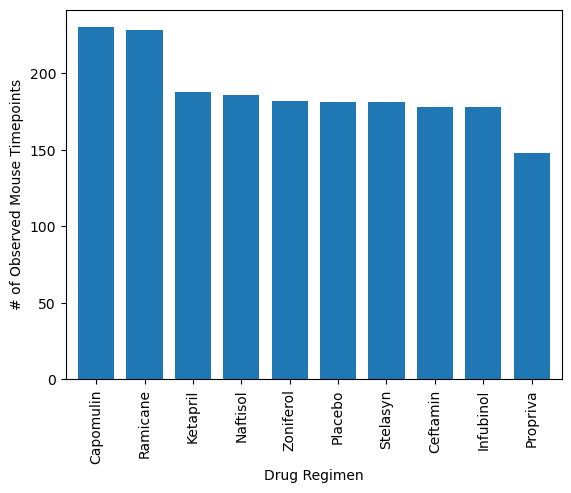

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each Drug Regimen using Pandas.

# Group by drug regimen and get number of observations for each drug
# Note: default sort of drug regimens is alphabetical; 
# add sort_values() to re-sort based on number of obs. in descending order to match assignment's target chart
# Use of sort_values() rather than sort() with assistance of Xpert Learning Assistant
numObsByDrug = cleanedDF.groupby(['Drug Regimen']).size().sort_values(ascending=False)

# Plot and display chart
numObsByDrug.plot(kind="bar", color="tab:blue", width=0.75)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("")
plt.xticks(rotation=90)
plt.show()
# color match to required output found here: https://matplotlib.org/stable/gallery/color/named_colors.html

In [10]:
# For generating bar plot using pyplot -- this will be used to create x-axis
numObsByDrug.index.values


array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype=object)

In [11]:
# For generating bar plot using pyplot -- this will be used to create y-axis
numObsByDrug.values


array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148])

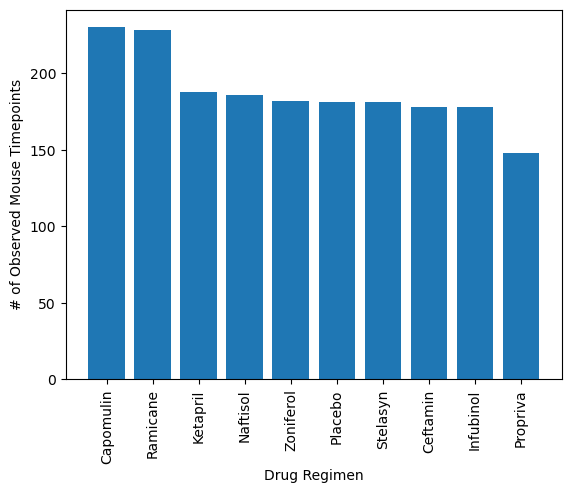

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each Drug Regimen using pyplot.

# Generate axis values
xAxis = numObsByDrug.index.values
yAxis = numObsByDrug.values

# Plot and display chart
plt.bar(xAxis, yAxis, color="tab:blue", align="center")
plt.xticks(numObsByDrug.index.values, numObsByDrug.index, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("")
plt.show()


In [13]:
# I have added validation step ahead of constructing pie charts.

# Separate observations by sex and get number of observations for each sex
numObsFemale = len(cleanedDF[cleanedDF["Sex"] == "Female"]) 
numObsMale = len(cleanedDF[cleanedDF["Sex"] == "Male"])

# Convert sizes to percents
percentFemale = round((numObsFemale / (numObsFemale + numObsMale) * 100),1)
percentMale = round((numObsMale / (numObsFemale + numObsMale) * 100),1)

# Display counts and percentages
print(f"Number (%) observations female: {numObsFemale} ({percentFemale}%)")
print(f"Number (%) observations male: {numObsMale} ({percentMale}%)")
print(f"Total number of observations: {numObsMale+numObsFemale}")

Number (%) observations female: 922 (49.0%)
Number (%) observations male: 958 (51.0%)
Total number of observations: 1880


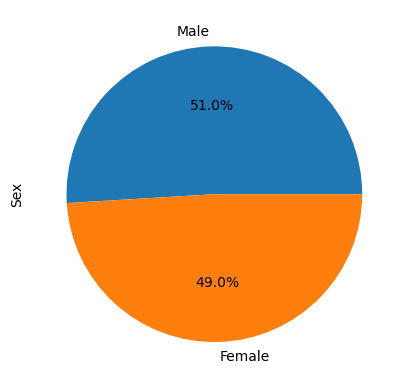

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas.

# Create a DataFrame with the number of observations by gender
# Correct syntax assistance from Xpert Learning Assistant
numObsByGender = pd.DataFrame({
    "Gender": ["Male", "Female"],
    "Count": [len(cleanedDF[cleanedDF["Sex"] == "Male"]), 
              len(cleanedDF[cleanedDF["Sex"] == "Female"])]
})

# Labels and colors for the sections of the pie chart
labels = ["Male", "Female"]
colors = ["tab:blue", "tab:orange"]

# Create pie chart (automatically calculates percentages of each section of pie chart)
numObsByGender.plot(kind="pie", y="Count", labels=labels, colors=colors, startangle=0, autopct="%1.1f%%", legend=False, shadow=False)

# Set the ylabel to "Sex"
plt.ylabel("Sex")

# Display pie chart
plt.show()


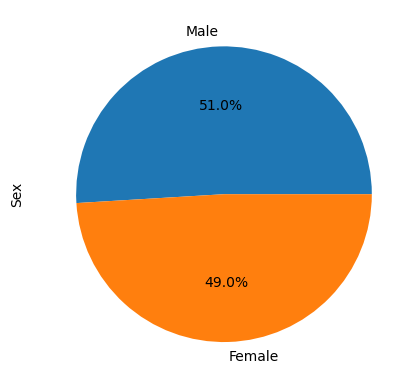

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.

# Create and display pie chart using the same data as in preceding step
plt.pie(numObsByGender["Count"], labels=labels, colors=colors, startangle=360, autopct="%1.1f%%", shadow=False)

# Add "Sex" label to the left of the pie chart
plt.text(-1.4, 0, "Sex", fontsize=10, ha='center', va='center', rotation=90)

# Display pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin.

# Start by getting the last (greatest) timepoint for each mouse
lastTimepointDF = cleanedDF.groupby("Mouse ID")["Timepoint"].max()
# lastTimepointDF

# Merge this group DF with the original (cleaned) DF to get the tumor volume at the last timepoint
# Merge on two columns suggested by Xpert Learning Assistant - very nice 
lastTimepointMergedDF = pd.merge(lastTimepointDF, cleanedDF, how="left", on=["Mouse ID", "Timepoint"])
lastTimepointMergedDF


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,dupeMice
0,a203,45,Infubinol,Female,20,23,67.973419,2,False
1,a251,45,Infubinol,Female,21,25,65.525743,1,False
2,a262,45,Placebo,Female,17,29,70.717621,4,False
3,a275,45,Ceftamin,Female,20,28,62.999356,3,False
4,a366,30,Stelasyn,Female,16,29,63.440686,1,False
...,...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0,False
244,z578,45,Ramicane,Male,11,16,30.638696,0,False
245,z581,45,Infubinol,Female,24,25,62.754451,3,False
246,z795,45,Naftisol,Female,13,29,65.741070,3,False


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create / re-create empty list to fill with tumor vol data (for plotting)
tumorVolList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatmentList:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finalTumorVol = lastTimepointMergedDF.loc[lastTimepointMergedDF["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Add to tumor volume list 
    tumorVolList.append(finalTumorVol)

    # Determine outliers using upper and lower bounds
    quartiles = finalTumorVol.quantile([.25, .5, .75])
    lowerq = quartiles[.25] # bottom of box
    upperq = quartiles[.75] # top of the box
    median = quartiles[.5] # line inside box
    iqr = upperq - lowerq # basis upon which to get whiskers
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    outliers = finalTumorVol.loc[(finalTumorVol < lowerbound) | (finalTumorVol > upperbound)]
    if len(outliers) == 0:
        print(f"{treatment}'s potential outliers: None")
    else:
        output = f"{treatment}'s potential outliers: "
        for o in outliers:
            output += f"{o} "
        print(output)


Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458 
Ceftamin's potential outliers: None


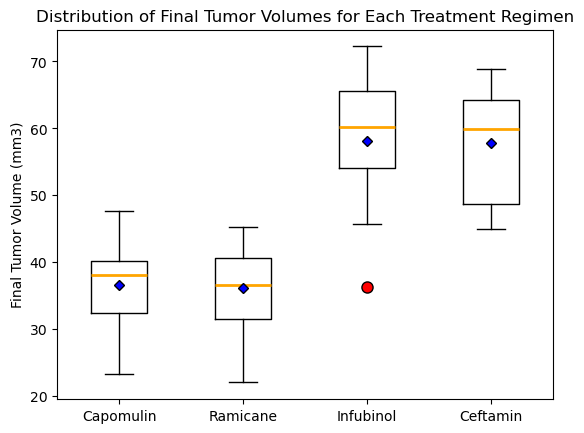

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# flierprops is used to customize outliers
flierprops = dict(marker="o", markerfacecolor="red", markersize=8, markeredgecolor="black")

# medianprops is used to customize median lines
medianprops = dict(linestyle="-", linewidth=2, color="orange") # sample line styles: -, -.-, --, 

# meanprops can be used to customize mean; here, use alternative
meanprops = dict(marker="D", markerfacecolor="blue", markersize=5, markeredgecolor="black") # D --> diamond for means


plt.boxplot(tumorVolList, tick_labels=treatmentList, flierprops=flierprops, medianprops=medianprops, 
            meanprops=meanprops, showmeans=True)
plt.title("Distribution of Final Tumor Volumes for Each Treatment Regimen")
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Mouse ID: s710
      Timepoint  Tumor Volume (mm3)
1432          0           45.000000
1433          5           43.180977
1434         10           43.688026
1435         15           41.845235
1436         20           42.629963
1437         25           43.060409
1438         30           43.571703
1439         35           44.160519
1440         40           40.171920
1441         45           40.728578 



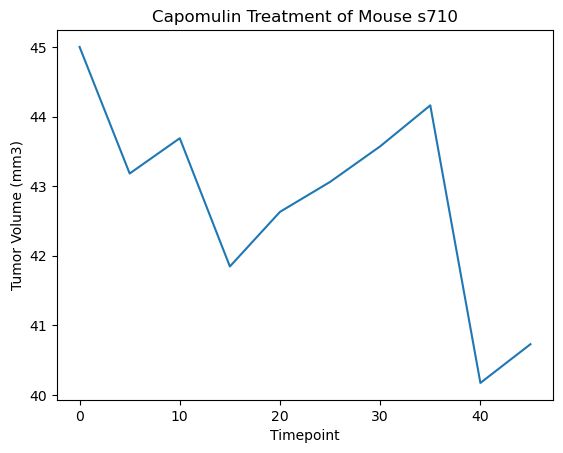

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin.

# Construct recudec, Capomulin, DF
capomulinDF = cleanedDF[cleanedDF['Drug Regimen'] == "Capomulin"]
capomulinDF
#len(capomulinDF)

# Select random row from Capomulin drug observations
# Xpert Learning Assistant suggested use of sample() to automate random row selection - much more straightforward than I expected
randomRow = capomulinDF.sample()

# Get the Mouse ID of the randomly selected row 
randomMouse = randomRow["Mouse ID"].iloc[0]

# Get all timepoints and tumor volumes from the  original (cleaned) DF for the randomly selected Mouse ID
randomMouseData = cleanedDF[cleanedDF["Mouse ID"] == randomMouse][["Timepoint", "Tumor Volume (mm3)"]]

# Display results
print(f"Mouse ID: {randomMouse}")
print(f"{randomMouseData} \n")

# Generate line plot
plt.plot(randomMouseData["Timepoint"], randomMouseData["Tumor Volume (mm3)"], "tab:blue")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.title(f"Capomulin Treatment of Mouse {randomMouse}")
plt.show()


Number of unique mice on Capomulin treatment: 25



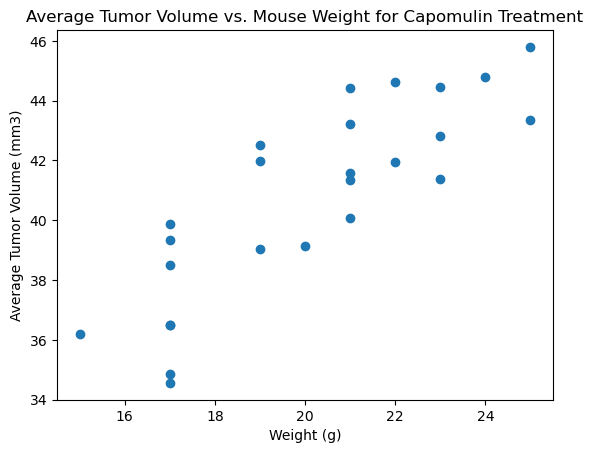

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Verification step
print(f"\nNumber of unique mice on Capomulin treatment: {capomulinDF["Mouse ID"].nunique()}\n")

# Group mice in Capomulin regimen by Mouse ID, then calculate the mean weight (which is constant per mouse) and tumor volume over Timepoints
aveTumorVolumecapMice = capomulinDF.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
aveWeightcapMice = capomulinDF.groupby(["Mouse ID"])["Weight (g)"].mean()

# Create scatter plot
plt.scatter(aveWeightcapMice, aveTumorVolumecapMice, marker="o", facecolors="tab:blue", edgecolors="tab:blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Treatment")
plt.show()


## Correlation and Regression


The r-squared is: 0.71
The correlation between mouse weight and average tumor volume is 0.84 



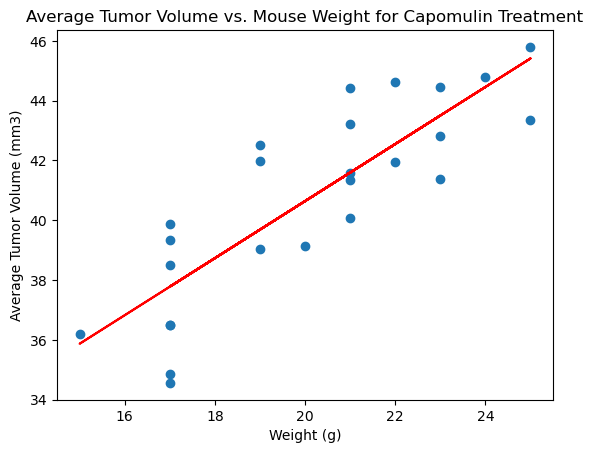

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen.

xValues = aveWeightcapMice
yValues = aveTumorVolumecapMice
plt.scatter(xValues, yValues, marker="o", facecolors="tab:blue", edgecolors="tab:blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Treatment")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regressValues = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(xValues,regressValues,"r-")
print(f"\nThe r-squared is: {rvalue**2:.2f}")
correlation = st.pearsonr(xValues, yValues)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)} \n")
plt.show()